In [1]:
## We will use the following libraries

import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Let us define the function that we want to calculate

def ratio(z):
    T = np.array([[1+z,0,0,0,1,1,1,z**2 + 2*z,z,2*z**2],
                  [3*z,0,0,0,2*z,z,0,4*z**2,2*z**2,0],
                  [3*z**2,0,0,0,z**2,0,0,2*z**3,z**3,2*z**4],
                  [z**3,0,0,0,0,0,0,0,0,0],
                  [0,1,0,0,0,0,0,0,0,0],
                  [0,0,1,0,0,0,0,0,0,0],
                  [0,0,0,1,0,0,0,0,0,0],
                  [0,0,0,0,1,0,0,0,0,0],
                  [0,0,0,0,0,1,0,0,0,0],
                  [0,0,0,0,0,0,0,1,0,0],])
    
    eigvals,eigvecs = np.linalg.eig(T)
    eigvals_abs = [abs(eig) for eig in eigvals]
    #print(f"Absolute Eigenvalues at z = {z} are: ", eigvals_abs)

    eigvals_abs.sort()
    return eigvals_abs[-1]/eigvals_abs[-2]  ## Return the ratio of the largest to the second largest eigenvalue

def ratio_notabs(z):
    T = np.array([[1+z,0,0,0,1,1,1,z**2 + 2*z,z,2*z**2],
                  [3*z,0,0,0,2*z,z,0,4*z**2,2*z**2,0],
                  [3*z**2,0,0,0,z**2,0,0,2*z**3,z**3,2*z**4],
                  [z**3,0,0,0,0,0,0,0,0,0],
                  [0,1,0,0,0,0,0,0,0,0],
                  [0,0,1,0,0,0,0,0,0,0],
                  [0,0,0,1,0,0,0,0,0,0],
                  [0,0,0,0,1,0,0,0,0,0],
                  [0,0,0,0,0,1,0,0,0,0],
                  [0,0,0,0,0,0,0,1,0,0],])
    
    eigvals,eigvecs = np.linalg.eig(T)
    eigvals_abs = [abs(eig) for eig in eigvals]

    #Sort eigvals in the same order as eigvals_abs
    eigvals = [eigvals[i] for i in np.argsort(eigvals_abs)]
    #print(eigvals)

    #print(f"Absolute Eigenvalues at z = {z} are: ", eigvals_abs)

    eigvals_abs.sort()
    
    #print(eigvals_abs)
    return eigvals[-1]/eigvals[-2]


In [3]:
test_val = 0.5
print(ratio_notabs(test_val))

(-0.3474524491594459+2.6155293331866662j)


In [4]:
## z can be anything in the complex plane, let us test out some values

ratio(1 + 1j)
ratio(2)
ratio(3 + 4j)

1.5646925397578133

In [5]:
## Now we have to design a subroutine that will calculate the ratio around a z point for different angles

num_angles = 100 #More gives a finer demarcation, keep it even
step_size = 0.1 #less gives a finer demarcation

angle_list = [2*i*np.pi/num_angles for i in range(num_angles)]


def ratio_around_z(z, angle_list, step_size,tol_points,tolerance = 1e-6):  #ensure tolerance is less than c
    ratio_list = []
    index = 0
    c_int = abs(ratio(z) - 1)
    c = c_int
    print("Initial dist is: ", c)
    for angle in angle_list:
        z_fin = z + step_size*np.exp(1j*angle)
        ratio_list.append(ratio(z_fin))

    for i in range(len(ratio_list)):
        #print("New dist is: ", abs(ratio_list[i] - 1))
        if abs(ratio_list[i] - 1) <= tolerance:
            #check = 2
            print("Val close to 1 found, appending in list!")
            #index = i
            tol_points.append(z + step_size*np.exp(1j*angle_list[i]))
        if abs(ratio_list[i] - 1) < c:
            #check = 1
            c = abs(ratio_list[i] - 1)
            print("Val less than prev dist found, changing index!")
            print("New min dist is: ", c)
            
            index = i

    if c_int == c:
        print("No Val close to 1 or less than prev dist!") 
        return z
    else:
        print("Angle of max gradient is: ", angle_list[index])
        return z + step_size*np.exp(1j*angle_list[index])
        
   
    



In [6]:
len(angle_list)

100

In [7]:
z_int = 1 #use different values to test
tol_points = []
ratio_around_z(z_int, angle_list, step_size,tol_points,tolerance = 1e-6)


Initial dist is:  1.2092282401419912
Val less than prev dist found, changing index!
New min dist is:  1.162067927697886
Val less than prev dist found, changing index!
New min dist is:  1.1611327734342862
Val less than prev dist found, changing index!
New min dist is:  1.160352184253079
Val less than prev dist found, changing index!
New min dist is:  1.159728434626925
Val less than prev dist found, changing index!
New min dist is:  1.1592636369885811
Val less than prev dist found, changing index!
New min dist is:  1.1589597401982612
Val less than prev dist found, changing index!
New min dist is:  1.1588185248952816
Angle of max gradient is:  0.37699111843077515


(1.0929776485888252+0.03681245526846779j)

In [8]:
## Since we have a gradient based method now, we can give number of steps

max_steps = 500

num_steps = 500
z_int_c = 2-3j
z_int = 2-3j
i=1
step_size = 0.1
plot_points = [z_int]
dist_vals = [abs(ratio(z_int) - 1)]
tol_points = []
while num_steps > 0:
    print(f"Step {i}:")
    z_fin = ratio_around_z(z_int, angle_list,step_size,tol_points,tolerance = 1e-4)
    if z_fin == z_int:
        print(f"Stuck at minima after {i} steps!")
        break
    else:
        plot_points.append(z_fin)
        dist_vals.append(abs(ratio(z_fin) - 1))
        z_int = z_fin
        i+=1
    num_steps -= 1
    print()

Step 1:
Initial dist is:  0.6013772637800834
Val less than prev dist found, changing index!
New min dist is:  0.6012627890776521
Val less than prev dist found, changing index!
New min dist is:  0.6007785011629061
Val less than prev dist found, changing index!
New min dist is:  0.6002978380863428
Val less than prev dist found, changing index!
New min dist is:  0.5998228639734144
Val less than prev dist found, changing index!
New min dist is:  0.5993555962168569
Val less than prev dist found, changing index!
New min dist is:  0.5988979953493752
Val less than prev dist found, changing index!
New min dist is:  0.598451955638498
Val less than prev dist found, changing index!
New min dist is:  0.5980192964593238
Val less than prev dist found, changing index!
New min dist is:  0.5976017544870558
Val less than prev dist found, changing index!
New min dist is:  0.5972009767376076
Val less than prev dist found, changing index!
New min dist is:  0.5968185144713036
Val less than prev dist found, c

In [8]:
#print("Final points are: ", plot_points)
print("Final distances are: ", dist_vals)

Final distances are:  [0.6013772637800834, 0.5939981155410521, 0.5867696291530002, 0.5796926186571125, 0.5727511062265602, 0.5659441853848441, 0.5592591463355618, 0.5526941095805211, 0.5462386756681472, 0.5398906165863742, 0.5336410377562619, 0.5274878897180433, 0.5214231001626151, 0.515445247713896, 0.5095464991865415, 0.5037264489482334, 0.4979770004603812, 0.49229910206391914, 0.4866839568940897, 0.48113416603354375, 0.4756398485100066, 0.4702055255130526, 0.46481989131770574, 0.4594891033220847, 0.4542103127439254, 0.44897961115062546, 0.4437969808393101, 0.43865611206573796, 0.43355998507644555, 0.42849966720821486, 0.42348060541174526, 0.41850053315752267, 0.4135558071762322, 0.40864778730654994, 0.4037695268241508, 0.3989260084038069, 0.39411458931476084, 0.38933238265583214, 0.38458087467529545, 0.379853327223177, 0.375154355212296, 0.37048246325349177, 0.365833958707211, 0.361211898188464, 0.35660827780946547, 0.35202741470464627, 0.3474702508539629, 0.34293096495431974, 0.338

In [9]:
def argand(a):
    for x in range(len(a)):
        plt.plot([0,a[x].real],[0,a[x].imag],'o',label='python')
    limit=np.max(np.ceil(np.absolute(a))) # set limits for axis
    plt.xlim((-limit,limit))
    plt.ylim((-limit,limit))
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    plt.title("Gradient descent visual for {} angles, {} steps, z = {} start point".format(num_angles,max_steps,z_int_c))
    plt.grid()
    plt.show()

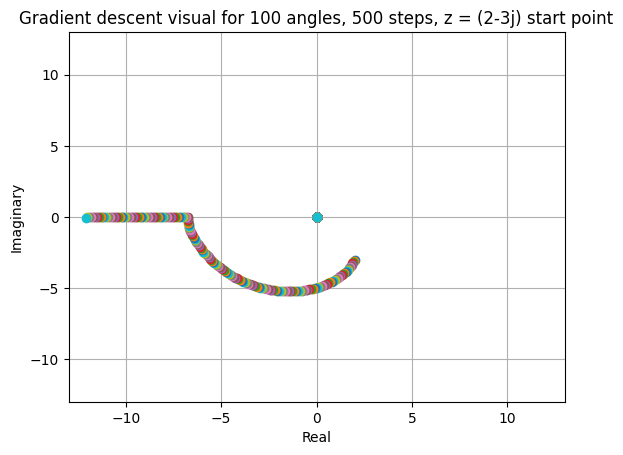

In [11]:
argand(plot_points)


In [12]:
print("Final point: ", plot_points[-1])

Final point:  (-12.065721973784786-0.09118391326142422j)


In [102]:
z = -8.95 + 0.000001j
print(abs(ratio(z) - 1))

6.266625152129279e-08


In [27]:
len(plot_points)

180

In [9]:
def argand2(a):
    for x in range(len(a)):
        plt.plot([a[x].real],[a[x].imag],'o',label='python')
    limit=np.max(np.ceil(np.absolute(a))) # set limits for axis
    plt.xlim((-limit,limit))
    plt.ylim((-limit,limit))
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    plt.title("Points close to 1 for {} angles, {} steps, z = {} start point".format(num_angles,max_steps,z_int_c))
    plt.grid()
    plt.show()

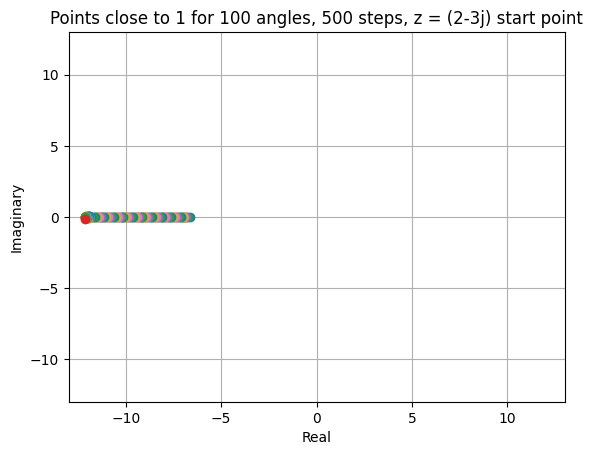

In [60]:
argand2(tol_points)

In [30]:
print(tol_points)

[(-6.623538698942642-0.0007012080148228886j), (-6.823144044628297-0.0007012080148228678j), (-6.723144044628297-0.0007012080148228678j), (-6.923144044628296-0.0007012080148228555j), (-6.823144044628297-0.0007012080148228555j), (-7.023144044628296-0.0007012080148228433j), (-6.923144044628296-0.0007012080148228433j), (-7.123144044628296-0.000701208014822831j), (-7.023144044628296-0.000701208014822831j), (-7.223144044628295-0.0007012080148228188j), (-7.123144044628296-0.0007012080148228188j), (-7.323144044628295-0.0007012080148228065j), (-7.223144044628295-0.0007012080148228065j), (-7.423144044628295-0.0007012080148227943j), (-7.323144044628295-0.0007012080148227943j), (-7.523144044628294-0.000701208014822782j), (-7.423144044628295-0.000701208014822782j), (-7.623144044628294-0.0007012080148227698j), (-7.523144044628294-0.0007012080148227698j), (-7.7231440446282935-0.0007012080148227575j), (-7.623144044628294-0.0007012080148227575j), (-7.823144044628293-0.0007012080148227453j), (-7.72314404

In [131]:
## Let us try to draw a heatmap image of the distance from 1

#Firstly we create a 100 x 100 grid of points in the complex plane

x = np.linspace(-20,0,2001)
y = np.linspace(-10,10,2001)

data = np.zeros((2001,2001))

for i in range(2001):
    for j in range(2001):
        data[j,i] = abs(ratio(x[i] + 1j*y[j]) - 1)


C:\Users\DELL\AppData\Local\Temp\ipykernel_40012\288389249.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  return eigvals_abs[-1]/eigvals_abs[-2]  ## Return the ratio of the largest to the second largest eigenvalue


In [146]:
x2 = np.linspace(-25,25,2001)
y2 = np.linspace(-25,25,2001)

data2 = np.zeros((2001,2001))

for i in range(2001):
    for j in range(2001):
        data2[j,i] = abs(ratio(x2[i] + 1j*y2[j]) - 1)

C:\Users\DELL\AppData\Local\Temp\ipykernel_40012\288389249.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  return eigvals_abs[-1]/eigvals_abs[-2]  ## Return the ratio of the largest to the second largest eigenvalue


In [243]:
x3 = np.linspace(-13.8,-11.75,2001)
y3 = np.linspace(-1,1,2001)

data3 = np.zeros((2001,2001))

for i in range(2001):
    for j in range(2001):
        data3[j,i] = abs(ratio(x3[i] + 1j*y3[j]) - 1)

Text(0.5, 1.0, '$f(z) = \\left|\\frac{\\lambda_1(z)}{\\lambda_2(z)} - 1\\right|$ in LogScale View')

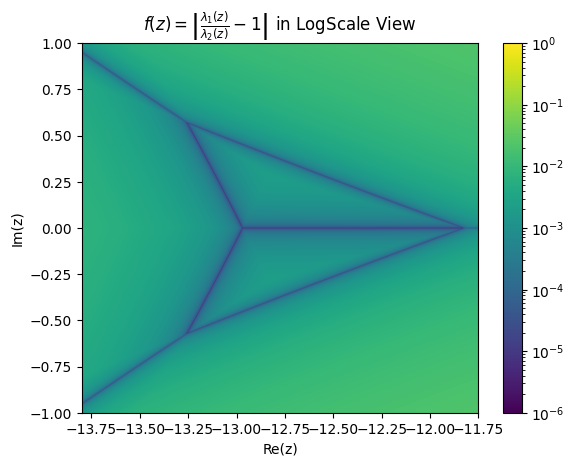

In [244]:
from matplotlib.colors import LogNorm
#import seaborn as sns
import math

#data = np.random.rand(20, 20)

log_norm = LogNorm(vmin=1e-6, vmax=1)
#cbar_ticks = [math.pow(10, i) for i in range(math.floor(math.log10(data.min().min())), 1+math.ceil(math.log10(data.max().max())))]

plt.imshow(data3,extent = (-13.8,-11.75,-1,1), aspect='auto', origin='lower',norm = log_norm,cmap = 'viridis')
plt.colorbar()
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.title(r"$f(z) = \left|\frac{\lambda_1(z)}{\lambda_2(z)} - 1\right|$ in LogScale View")

Text(0.5, 1.0, '$f(z) = \\left|\\frac{\\lambda_1(z)}{\\lambda_2(z)} - 1\\right|$ in Linear Scale View')

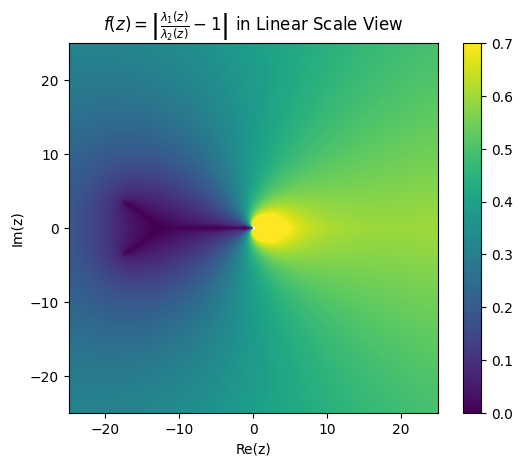

In [154]:
## Now we plot the heatmap

plt.imshow(data2, extent = (-25,25,-25,25), cmap = 'viridis', origin = 'lower', vmin=0, vmax=0.7)
plt.colorbar()
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.title(r"$f(z) = \left|\frac{\lambda_1(z)}{\lambda_2(z)} - 1\right|$ in Linear Scale View")

In [171]:
tol_points_hm = []
for i in range(2001):
    for j in range(2001):
        if data[j,i] < 1e-5:  #Change this value to get more or less points
            tol_points_hm.append(x[i] + 1j*y[j])

branch_3 = []
for i in range(2001):
    for j in range(2001):
        if data[j,i] < 1e-5 and abs(y[j]) == 0:  #Change this value to get more or less points
            branch_3.append(x[i])

branch_3 = list(set(branch_3))


In [172]:
print(branch_3)

[-0.9899999999999984, -0.9800000000000004, -0.9699999999999989, -0.9600000000000009, -0.9499999999999993, -0.9400000000000013, -0.9299999999999997, -0.9199999999999982, -0.9100000000000001, -0.8999999999999986, -0.75, -0.5, -0.25, -10.81, -10.56, -10.31, -10.06, -9.56, -9.31, -9.06, -8.56, -8.31, -8.06, -7.5600000000000005, -7.3100000000000005, -7.0600000000000005, -6.5600000000000005, -6.3100000000000005, -6.0600000000000005, -5.5600000000000005, -5.3100000000000005, -5.0600000000000005, -4.5600000000000005, -4.3100000000000005, -4.0600000000000005, -12.620000000000001, -12.370000000000001, -12.870000000000001, -12.120000000000001, -3.870000000000001, -3.620000000000001, -3.370000000000001, -3.120000000000001, -2.870000000000001, -2.620000000000001, -2.370000000000001, -2.120000000000001, -1.120000000000001, -1.870000000000001, -1.620000000000001, -0.870000000000001, -0.620000000000001, -0.370000000000001, -0.120000000000001, -3.9899999999999984, -3.7399999999999984, -3.48999999999999

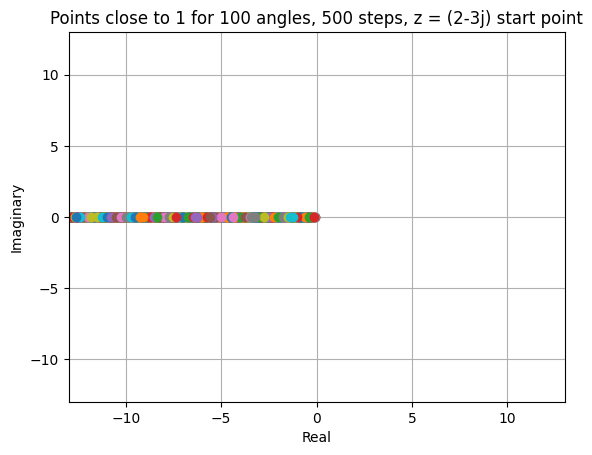

In [173]:
argand2(branch_3)

In [174]:
branch_3.sort()
print(branch_3)

[-12.969999999999999, -12.96, -12.95, -12.94, -12.93, -12.92, -12.91, -12.899999999999999, -12.89, -12.879999999999999, -12.870000000000001, -12.86, -12.85, -12.84, -12.83, -12.82, -12.809999999999999, -12.8, -12.79, -12.780000000000001, -12.77, -12.76, -12.75, -12.74, -12.73, -12.719999999999999, -12.71, -12.7, -12.69, -12.68, -12.67, -12.66, -12.649999999999999, -12.64, -12.629999999999999, -12.620000000000001, -12.61, -12.6, -12.59, -12.58, -12.57, -12.559999999999999, -12.55, -12.54, -12.530000000000001, -12.52, -12.51, -12.5, -12.49, -12.48, -12.469999999999999, -12.46, -12.45, -12.44, -12.43, -12.42, -12.41, -12.399999999999999, -12.39, -12.379999999999999, -12.370000000000001, -12.36, -12.35, -12.34, -12.33, -12.32, -12.309999999999999, -12.3, -12.29, -12.280000000000001, -12.27, -12.26, -12.25, -12.24, -12.23, -12.219999999999999, -12.21, -12.2, -12.19, -12.18, -12.17, -12.16, -12.149999999999999, -12.14, -12.129999999999999, -12.120000000000001, -12.11, -12.1, -12.09, -12.08, 

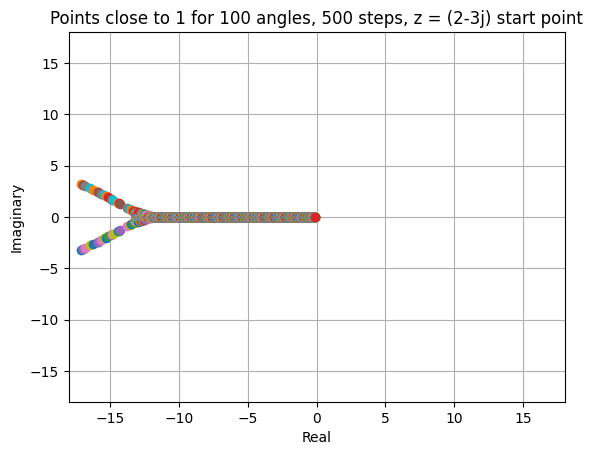

In [175]:
argand2(tol_points_hm)  ## This will plot the points close to 1 in the heatmap

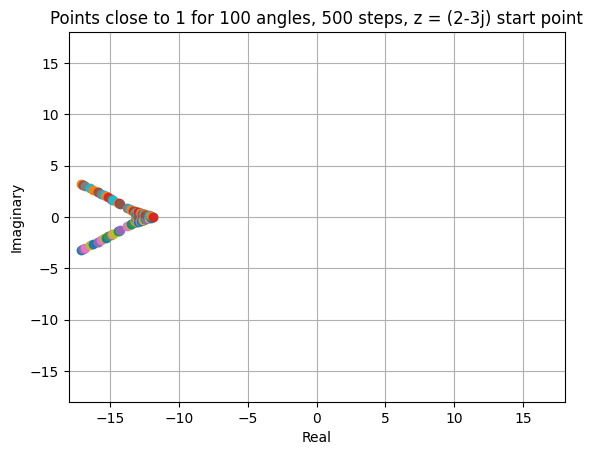

In [176]:
branch_imag = [point for point in tol_points_hm if point.imag != 0]

argand2(branch_imag)

#branch_1 = tol_points_hm[::2]
#branch_2 = tol_points_hm[1::2]

#argand2(branch_1)
#argand2(branch_2)

branch_1 = branch_imag[::2]
branch_2 = branch_imag[1::2]




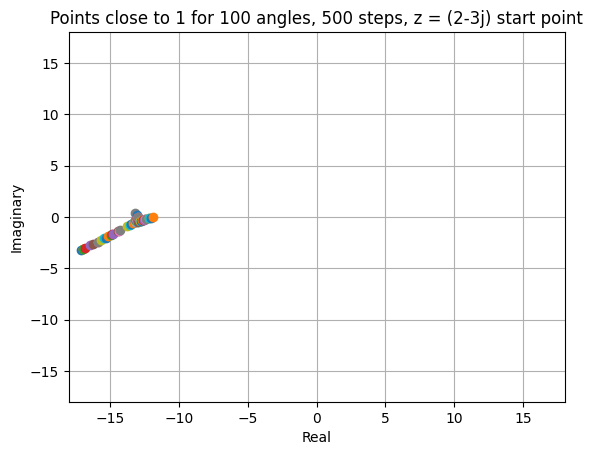

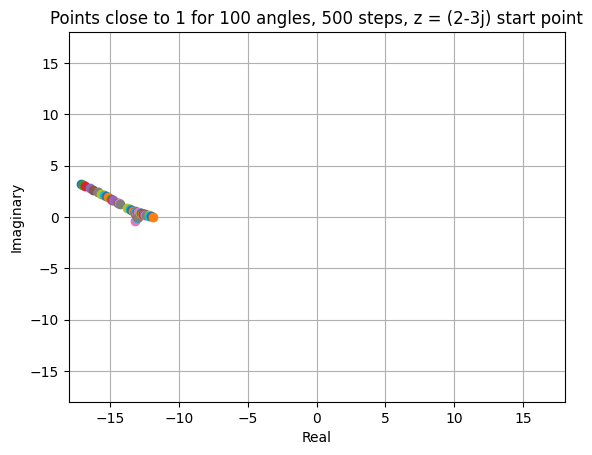

In [177]:
argand2(branch_1)
argand2(branch_2)

In [179]:
print(branch_1[-1])
print(branch_1[0])

(-11.879999999999999-0.019999999999999574j)
(-17.12-3.21j)


In [11]:
#Let us do a curve fit on the branch_1 and branch_2

xvals3 = np.array([point.real for point in branch_1])
yvals3 = np.array([point.imag for point in branch_1])

def linfit(x,a,b):
    return a*x + b

optimizedParameters_1, pcov = opt.curve_fit(linfit, xvals3, yvals3)

# Use the optimized parameters to plot the best fit
plt.plot(xvals3, yvals3, ".", label="Data")
plt.plot(xvals3, linfit(xvals3, *optimizedParameters_1), label=f"fit, a= {round(optimizedParameters_1[0],3)}")

print(optimizedParameters_1)

# Show the graph
plt.legend()
plt.title("Curve fitting for branch 3 (negative real axis)")
plt.show()

print("Branching point is :", -optimizedParameters_1[1]/optimizedParameters_1[0])



NameError: name 'branch_1' is not defined

In [184]:
slope = -0.68888844
intercept = -3.414 + slope*17.47

def b1fit(x):
    return x + 1j*(optimizedParameters_1[0]*x + optimizedParameters_1[1])

def b1fit_2(x):
    return x + 1j*(slope*x + intercept)

x = -14

print(abs(ratio(b1fit(x))-1))
print(abs(ratio(b1fit_2(x))-1))
print(b1fit(x))
print(b1fit_2(x))



0.0012562644568001602
0.11487590755082544
(-14-1.0463475376993117j)
(-14-5.8044428868j)


In [88]:
#Slopes of the line of zeros (rejecting outlier points) is:

slope = (branch_1[-1].imag - branch_1[0].imag)/(branch_1[-1].real - branch_1[0].real)
print("Slope of branch 1 is: ", slope)

Slope of branch 1 is:  0.6973684210526304


In [99]:
print(branch_3[0])

-0.987993996998501


In [89]:
#Line intercept for branch 1 is:

intercept = branch_1[0].imag - slope*branch_1[0].real
print("Intercept of branch 1 is: ", intercept)

Intercept of branch 1 is:  8.664802631578931


In [92]:
## Now we calculate the phase on these lines of zeroes

phase_branch_1 = [np.angle(ratio_notabs(point)) for point in branch_1]
phase_branch_2 = [np.angle(ratio_notabs(point)) for point in branch_2]
phase_branch_3 = [np.angle(ratio_notabs(point)) for point in branch_3]

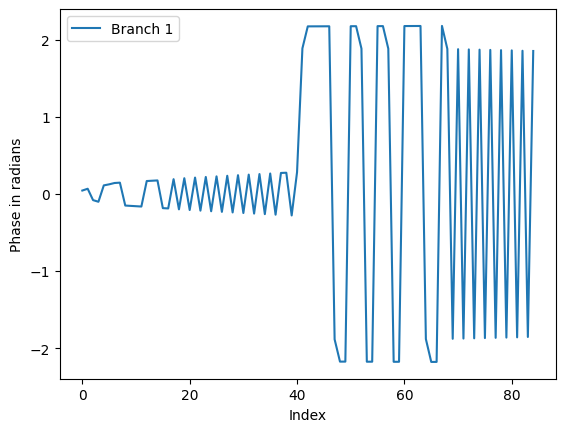

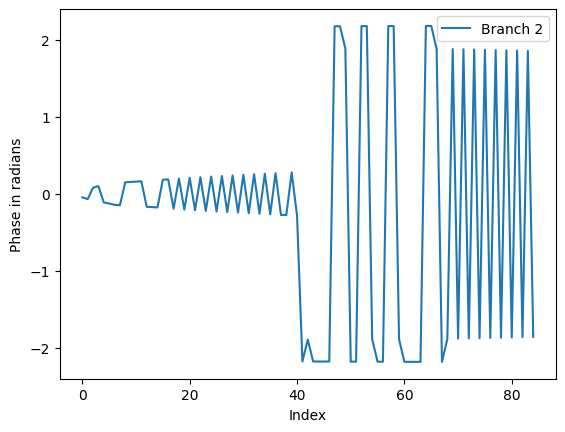

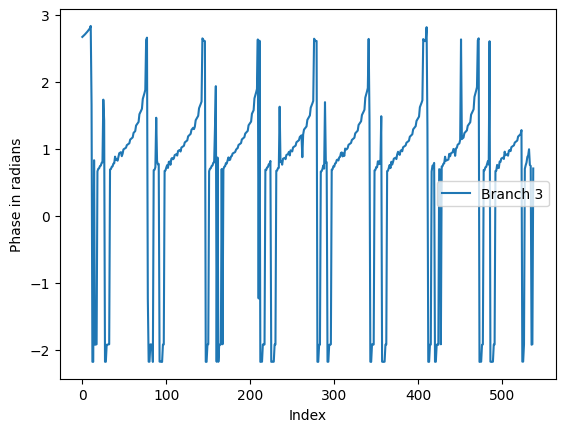

In [97]:
plt.plot(phase_branch_1, label = "Branch 1")
plt.xlabel("Index")
plt.ylabel("Phase in radians")
plt.legend()
plt.show()
plt.plot(phase_branch_2, label = "Branch 2")
plt.xlabel("Index")
plt.ylabel("Phase in radians")
plt.legend()
plt.show()
plt.plot(phase_branch_3, label = "Branch 3")
plt.xlabel("Index")
plt.ylabel("Phase in radians")
plt.legend()
plt.show()

In [12]:
# We calculate the actual phase jumps on the branches present here.

def highest_eigval(z):
    T = np.array([[1+z,0,0,0,1,1,1,z**2 + 2*z,z,2*z**2],
                  [3*z,0,0,0,2*z,z,0,4*z**2,2*z**2,0],
                  [3*z**2,0,0,0,z**2,0,0,2*z**3,z**3,2*z**4],
                  [z**3,0,0,0,0,0,0,0,0,0],
                  [0,1,0,0,0,0,0,0,0,0],
                  [0,0,1,0,0,0,0,0,0,0],
                  [0,0,0,1,0,0,0,0,0,0],
                  [0,0,0,0,1,0,0,0,0,0],
                  [0,0,0,0,0,1,0,0,0,0],
                  [0,0,0,0,0,0,0,1,0,0],])
    
    eigvals,eigvecs = np.linalg.eig(T)
    eigvals_abs = [abs(eig) for eig in eigvals]

    #Sort eigvals in the same order as eigvals_abs
    eigvals = [eigvals[i] for i in np.argsort(eigvals_abs)]
    #print(eigvals)

    #print(f"Absolute Eigenvalues at z = {z} are: ", eigvals_abs)

    eigvals_abs.sort()
    
    #print(eigvals_abs)
    return eigvals[-1]

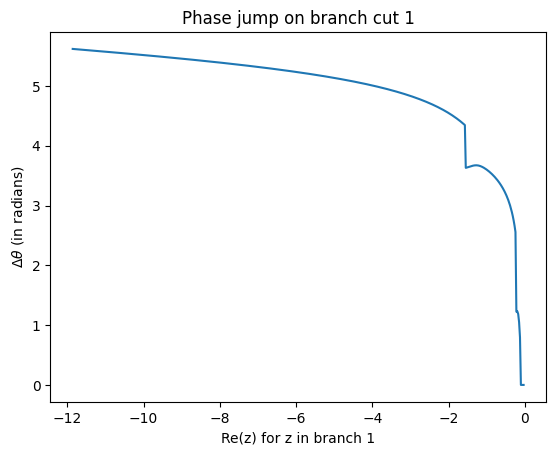

In [16]:
c= -0.03

vals = np.linspace(-11.85741276,c,500)  #one value = -11.85741276, other value = -13.00089939

epsilon = 0.0000000000001

z_arr_above = [val + epsilon*1j for val in vals]
z_arr_below = [val - epsilon*1j for val in vals]

phase_above = [np.angle(highest_eigval(z - c)) for z in z_arr_above]
phase_below = [np.angle(highest_eigval(z - c)) for z in z_arr_below]

phase_jump = [abs(phase_above[i] - phase_below[i]) for i in range(len(phase_above))]


plt.plot(vals,phase_jump)
plt.title("Phase jump on branch cut 1")
plt.xlabel("Re(z) for z in branch 1")
plt.ylabel(r"$\Delta \theta$ (in radians)")
plt.show()

In [49]:
z = -12 +0j

print(np.angle(highest_eigval(z + epsilon*1j - c)))

0.957066964742766


[0.19780681 3.68134389]


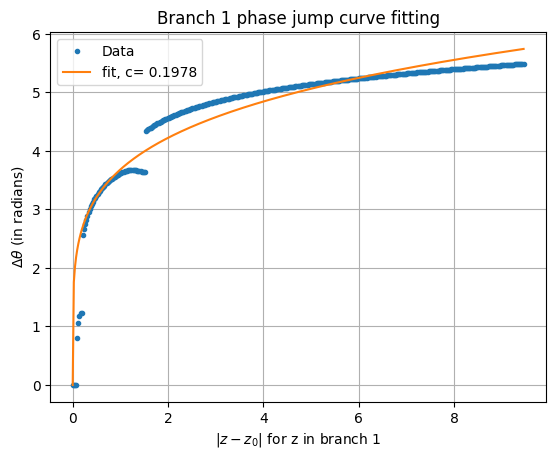

In [61]:
abs_vals2 = [abs(z + 0.03) for z in vals]
xdata = np.array(abs_vals2[100:])
ydata = np.array(phase_jump[100:])

def func(x,c,d):  ## Function to fit, power law
    return d*x**c
# The actual curve fitting happens here
optimizedParameters2, pcov = opt.curve_fit(func, xdata, ydata)

# Use the optimized parameters to plot the best fit
plt.plot(xdata, ydata, ".", label="Data")
plt.plot(xdata, func(xdata, *optimizedParameters2), label=f"fit, c= {round(optimizedParameters2[0],4)}")

print(optimizedParameters2)

# Show the graph
plt.legend()
plt.title("Branch 1 phase jump curve fitting")
plt.ylabel(r"$\Delta \theta$ (in radians)")
plt.xlabel(r"$|z - z_0|$ for z in branch 1")
plt.grid()
plt.show()

In [128]:
print(phase_jump)

[5.619000072098388, 5.6177511003940666, 5.6165009583858545, 5.6152496369618525, 5.613997126936936, 5.612743419052587, 5.611488503976774, 5.610232372303746, 5.608975014553877, 5.607716421173423, 5.6064565825343635, 5.605195488934134, 5.603933130595411, 5.602669497665864, 5.601404580217883, 5.6001383682483095, 5.598870851678147, 5.597602020352268, 5.596331864039091, 5.595060372430273, 5.593787535140338, 5.5925133417063675, 5.591237781587619, 5.589960844165132, 5.588682518741376, 5.587402794539833, 5.586121660704565, 5.584839106299827, 5.583555120309594, 5.582269691637134, 5.580982809104507, 5.579694461452147, 5.578404637338314, 5.577113325338621, 5.575820513945523, 5.574526191567758, 5.573230346529838, 5.571932967071479, 5.570634041347027, 5.569333557424888, 5.568031503286933, 5.566727866827891, 5.565422635854701, 5.564115798085928, 5.562807341151065, 5.561497252589899, 5.5601855198518395, 5.558872130295195, 5.55755707118652, 5.556240329699843, 5.554921892915987, 5.553601747821788, 5.552

In [27]:
## Let us see similar phase jumps on the other branch cuts

def branch1_cut(x):
    slope = -3.41/(17.47 - 14.1)
    y = slope*(x + 14.1)
    return x + 1j*y

def branch2_cut(x):
    slope = 3.41/(17.47 - 14.1)
    y = slope*(x + 14.1)
    return x + 1j*y

In [28]:
print(branch1_cut(-17.47))

(-17.47+3.4099999999999997j)


In [29]:
slope = 3.41/(17.47 - 14.1)
print(np.arctan(slope))

0.7912977999642283


In [30]:
def direction(slope):
    #Find the direction unit vector based on slope
    theta = np.arctan(slope)

    return np.cos(theta) + 1j*np.sin(theta)

In [31]:
def angle1(z,slope):
    #firstly, find the branch cut theta

    theta = np.arctan(slope) + np.pi
    if np.angle(z) < theta:
        return np.angle(z)
    else:
        return np.angle(z) - 2*np.pi
    
def angle2(z,slope):
    #firstly, find the branch cut theta

    theta = np.arctan(slope) - np.pi
    if np.angle(z) > theta:
        return np.angle(z)
    else:
        return np.angle(z) + 2*np.pi

In [32]:
epsilon = 0.01

x_vals = np.linspace(-17.47,-14.1,500)

z_arr_above1 = [branch1_cut(val) + epsilon*direction(1/slope) for val in x_vals]
z_arr_below1 = [branch1_cut(val) - epsilon*direction(1/slope) for val in x_vals]

z_arr_above2 = [branch2_cut(val) + epsilon*direction(-1/slope) for val in x_vals]
z_arr_below2 = [branch2_cut(val) - epsilon*direction(-1/slope) for val in x_vals]

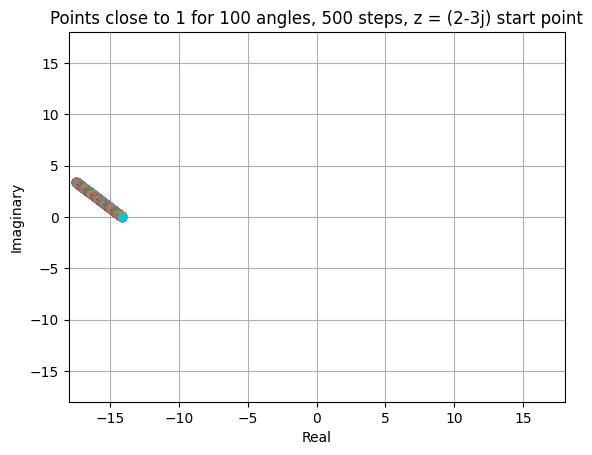

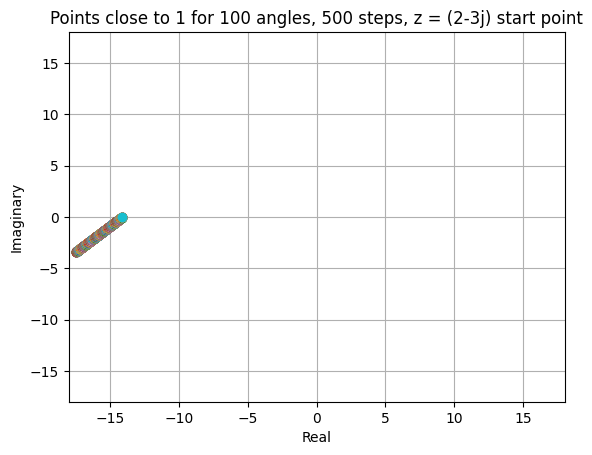

In [33]:
comp_list1 = []
for i in range(len(x_vals)):
    comp_list1.append(z_arr_above1[i])
    comp_list1.append(z_arr_below1[i])
branch2_list = [branch2_cut(val) for val in x_vals]
comp_list2 = []
for i in range(len(x_vals)):
    comp_list2.append(z_arr_above2[i])
    comp_list2.append(branch2_list[i])

argand2(comp_list1)
argand2(comp_list2)

Text(0, 0.5, 'Phase jump')

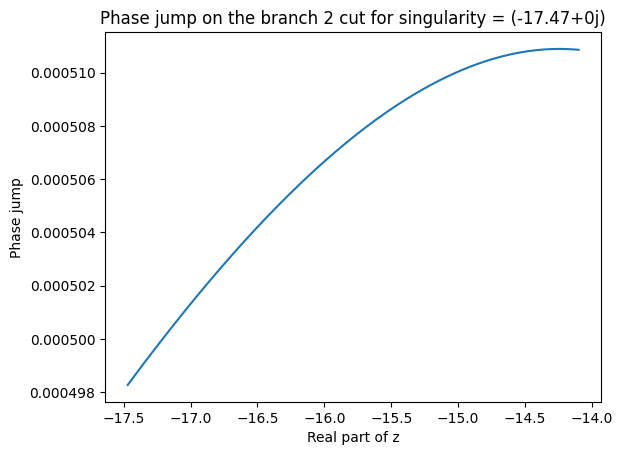

In [34]:
c = -17.47 + 0j

phase_above1 = [angle1(highest_eigval(z + c),-slope) for z in z_arr_above1]
phase_below1 = [angle1(highest_eigval(z + c),-slope) for z in z_arr_below1]

phase_jump1 = [-(phase_above1[i] - phase_below1[i]) for i in range(len(phase_above1))]

plt.plot(x_vals,phase_jump1)
plt.title(f"Phase jump on the branch 2 cut for singularity = {c}")
plt.xlabel("Real part of z")
plt.ylabel("Phase jump")

Text(0, 0.5, 'Phase jump')

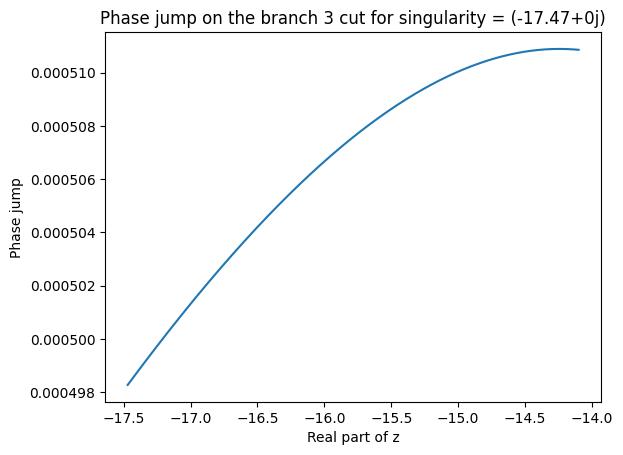

In [35]:
phase_above2 = [angle2(highest_eigval(z + c),slope) for z in z_arr_above2]
phase_below2 = [angle2(highest_eigval(z + c),slope) for z in z_arr_below2]

phase_jump2 = [(phase_above2[i] - phase_below2[i]) for i in range(len(phase_above2))]

plt.plot(x_vals,phase_jump2)
plt.title(f"Phase jump on the branch 3 cut for singularity = {c}")
plt.xlabel("Real part of z")
plt.ylabel("Phase jump")
               
               

In [18]:
import scipy.optimize as opt

[0.0, 0.00675350701402877, 0.01350701402805754, 0.020260521042082758, 0.027014028056111528, 0.0337675350701403, 0.04052104208416907, 0.04727454909819784, 0.054028056112223055, 0.060781563126251825, 0.0675350701402806, 0.07428857715430937, 0.08104208416833814, 0.08779559118236335, 0.09454909819639212, 0.10130260521042089, 0.10805611222444966, 0.11480961923847843, 0.12156312625250365, 0.12831663326653242, 0.1350701402805612, 0.14182364729458996, 0.14857715430861873, 0.15533066132264395, 0.16208416833667272, 0.1688376753507015, 0.17559118236473026, 0.18234468937875903, 0.18909819639278425, 0.19585170340681302, 0.20260521042084179, 0.20935871743487056, 0.21611222444889933, 0.22286573146292454, 0.2296192384769533, 0.23637274549098208, 0.24312625250501085, 0.24987975951903962, 0.25663326653306484, 0.2633867735470936, 0.2701402805611224, 0.27689378757515115, 0.2836472945891799, 0.29040080160320514, 0.2971543086172339, 0.3039078156312627, 0.31066132264529145, 0.3174148296593202, 0.324168336673

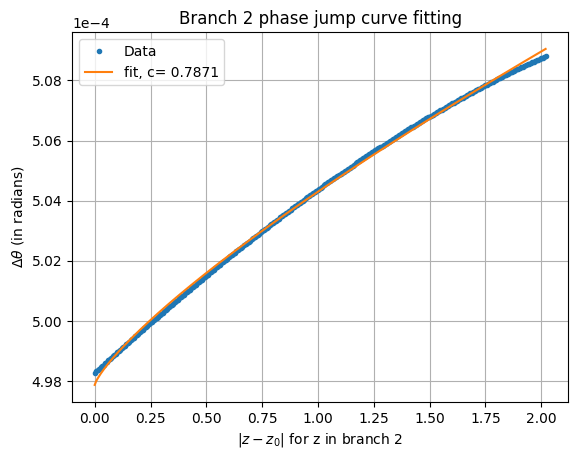

In [64]:
abs_vals = [abs(z + 17.47) for z in x_vals]
print(abs_vals[:50])


xdata = np.array(abs_vals[:300])
ydata = np.array(phase_jump1[:300])

def func(x,a,c,d):  ## Function to fit, power law
    return c*x**a + d
# The actual curve fitting happens here
optimizedParameters1, pcov = opt.curve_fit(func, xdata, ydata)

# Use the optimized parameters to plot the best fit
plt.plot(xdata, ydata, ".", label="Data")
plt.plot(xdata, func(xdata, *optimizedParameters1), label="fit, c= {}".format(round(optimizedParameters1[0],4)))

print(optimizedParameters1)

# Show the graph
plt.legend()
plt.title("Branch 2 phase jump curve fitting")
plt.ylabel(r"$\Delta \theta$ (in radians)")
plt.xlabel(r"$|z - z_0|$ for z in branch 2")
plt.ticklabel_format(axis='both', style='sci', scilimits=(-4,0))
plt.grid()
plt.show()